In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import datetime
import time
from matplotlib import pyplot as plt
import requests
from textblob import TextBlob
import re
import os.path
import seaborn as sns
sns.set()
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout,GRU,Layer,Flatten, concatenate
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers
from sklearn.manifold import TSNE
from datetime import date,datetime, timedelta
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter('ignore')
import pystan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import pystan
import datetime
sns.set()
sns.set_style("whitegrid")

/anaconda3/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
sp500_tickers=['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'ADT', 'AAP', 'AES',
       'AET', 'AFL', 'AMG', 'A', 'APD', 'ARG', 'AKAM', 'AA', 'AGN',
       'ALXN', 'ALLE', 'ADS', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE',
       'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN',
       'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM',
       'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY',
       'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX',
       'BBBY', 'BRK-B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP',
       'BSX', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM',
       'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS',
       'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG',
       'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS',
       'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CPGX',
       'CMCSA', 'CMA', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST',
       'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA',
       'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DFS', 'DISCA', 'DISCK',
       'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB',
       'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC',
       'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR',
       'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV',
       'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FISV', 'FLIR',
       'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR',
       'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC',
       'GILD', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS',
       'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HES', 'HPE', 'HD', 'HON', 'HRL',
       'HST', 'HPQ', 'HUM', 'HBAN', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE',
       'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC',
       'JBHT', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR',
       'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH',
       'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC',
       'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC',
       'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI',
       'MCK', 'MJN', 'WRK', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU',
       'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS',
       'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL',
       'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL',
       'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY',
       'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PH', 'PDCO', 'PAYX', 'PYPL',
       'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM',
       'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX',
       'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA',
       'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O',
       'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP',
       'ROST', 'RCL', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX',
       'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA',
       'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT',
       'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SYY', 'TROW', 'TGT',
       'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY',
       'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJX', 'TMK', 'TSS', 'TSCO',
       'RIG', 'TRIP', 'FOXA', 'FOX', 'TSN', 'TYC', 'USB', 'UA', 'UNP',
       'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC',
       'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V',
       'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC',
       'HCN', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN',
       'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH',
       'ZION', 'ZTS']

In [83]:
stock_list=sp500_tickers+['^GSPC']
tickers_dir='stockdata/'
def get_stock_price_data(tickers_dir,stock_list,
                start_date="2020-01-01", end_date="2020-01-05"):
    incorr_list=[]
    for i in stock_list:
        print (i)
        try:
            ts_data=web.DataReader(i, "yahoo", pd.to_datetime(start_date), pd.to_datetime(end_date))
            file_name=i.replace('^','')+'.csv'
            ts_data.reset_index().to_csv(tickers_dir+file_name,index=False)
        except:
            incorr_list.append(i)
            print ('incorrect ticker loading')
    return(incorr_list)
    print ('Done')
incorr_list=get_stock_price_data(tickers_dir, stock_list, start_date="2000-01-01", end_date="2020-03-25")

MMM
ABT
ABBV
ACN
ATVI
ADBE
ADT
AAP
AES
AET
AFL
AMG
A
APD
ARG
incorrect ticker loading
AKAM
AA
AGN
ALXN
ALLE
ADS
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AMP
ABC
AME
AMGN
APH
APC
incorrect ticker loading
ADI
AON
APA
AIV
AAPL
AMAT
ADM
AIZ
T
ADSK
ADP
AN
AZO
AVGO
AVB
AVY
BHI
BLL
BAC
BK
BCR
incorrect ticker loading
BXLT
incorrect ticker loading
BAX
BBT
incorrect ticker loading
BDX
BBBY
BRK-B
BBY
BIIB
BLK
HRB
BA
BWA
BXP
BSX
BMY
BRCM
incorrect ticker loading
BF-B
CHRW
CA
CVC
incorrect ticker loading
COG
CAM
incorrect ticker loading
CPB
COF
CAH
HSIC
KMX
CCL
CAT
CBG
incorrect ticker loading
CBS
CELG
CNP
CTL
CERN
CF
SCHW
CHK
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CTXS
CLX
CME
CMS
COH
incorrect ticker loading
KO
CCE
CTSH
CL
CPGX
incorrect ticker loading
CMCSA
CMA
CAG
COP
CNX
ED
STZ
GLW
COST
CCI
CSRA
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DLPH
DAL
XRAY
DVN
DO
DFS
DISCA
DISCK
DG
DLTR
D
DOV
DOW
DPS
incorrect ticker loading
DTE
DD
DUK
DNB
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMC
EMR
ENDP
ESV
incorrect ticke

In [229]:
incorr_list=get_stock_price_data(tickers_dir, ['ZOOM','UBER'], start_date="2000-01-01", end_date="2020-03-25")

ZOOM
UBER


In [97]:
incorr_list

['ARG',
 'APC',
 'BCR',
 'BXLT',
 'BBT',
 'BRCM',
 'CVC',
 'CAM',
 'CBG',
 'COH',
 'CPGX',
 'DPS',
 'ESV',
 'GGP',
 'HRS',
 'HCP',
 'GMCR',
 'LLL',
 'LVLT',
 'LUK',
 'LLTC',
 'MHFI',
 'MJN',
 'KORS',
 'PCLN',
 'RHT',
 'RAI',
 'SNDK',
 'SCG',
 'STJ',
 'SPLS',
 'SYMC',
 'TE',
 'TSO',
 'TWC',
 'TMK',
 'TSS',
 'TYC',
 'HCN',
 'WFM',
 'WYN',
 'YHOO']

In [96]:
'^GSPC' in stock_list

True

In [85]:
len(sp500_tickers)

502

In [104]:
tick_list=[x for x in stock_list if x not in incorr_list]
len(tick_list)

461

In [105]:
tick_list1=pd.Series(tick_list).unique().tolist()
len(tick_list1)
tick_list=tick_list1

In [107]:
tick_list=[x.replace('^','') for x in tick_list]

In [108]:
pd.DataFrame(tick_list,columns=['ticker']).to_csv('tickerslist.csv',index=False)

In [103]:
'^GSPC' in tick_list

False

In [100]:
tick_list

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADBE',
 'ADT',
 'AAP',
 'AES',
 'AET',
 'AFL',
 'AMG',
 'A',
 'APD',
 'AKAM',
 'AA',
 'AGN',
 'ALXN',
 'ALLE',
 'ADS',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'ADM',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AN',
 'AZO',
 'AVGO',
 'AVB',
 'AVY',
 'BHI',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BBBY',
 'BRK-B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'BF-B',
 'CHRW',
 'CA',
 'COG',
 'CPB',
 'COF',
 'CAH',
 'HSIC',
 'KMX',
 'CCL',
 'CAT',
 'CBS',
 'CELG',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CCE',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP',
 'CNX',
 'ED',
 'STZ',
 'GLW',
 'COST',
 'CCI',
 'CSRA',
 'CSX',
 'CMI',
 'CVS',
 'DHI',
 'DHR',
 'DRI',


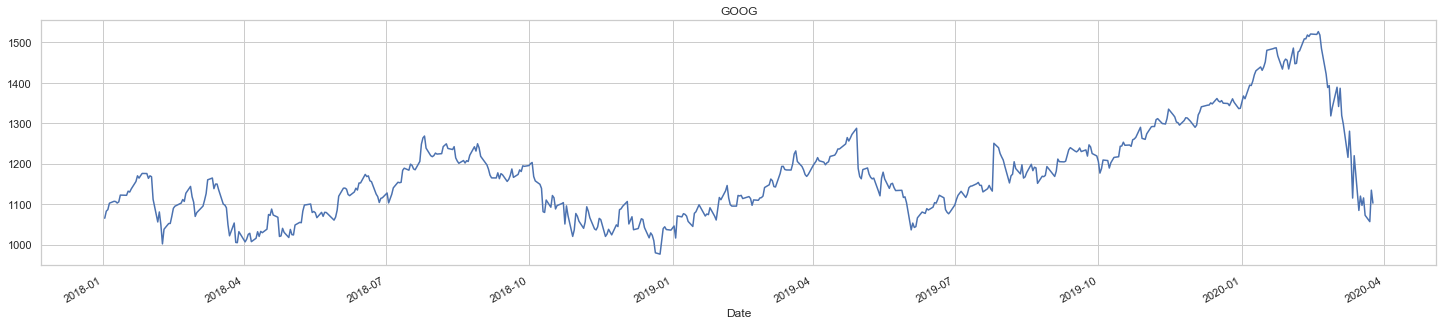

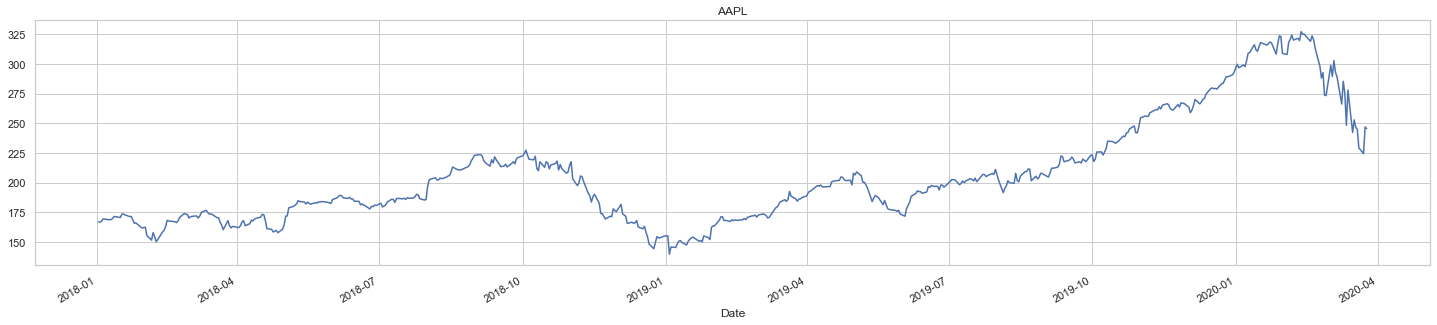

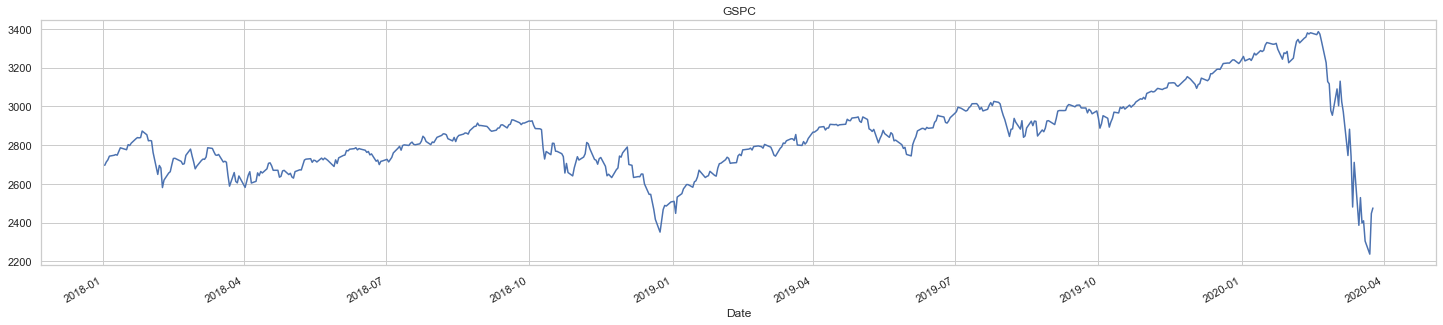

In [3]:
def get_ticker_data(ticker,dates=['2005','2020'],tickers_dir='stockdata/',plot_stock=True):
    df=pd.read_csv(tickers_dir+ticker+'.csv')
    df.Date=pd.to_datetime(df.Date)
    df.set_index('Date',inplace=True)
    df=df[dates[0]:dates[1]]
    df.columns=[x.replace(' ','') for x in df.columns]
    if (plot_stock):
        df.AdjClose.plot(figsize=(25,5),title=ticker)
        plt.show()
    return(df)
dates=['2018','2020']
df=get_ticker_data('GOOG',dates=dates)
df=get_ticker_data('AAPL',dates=dates)
dfind=get_ticker_data('GSPC',dates=dates)

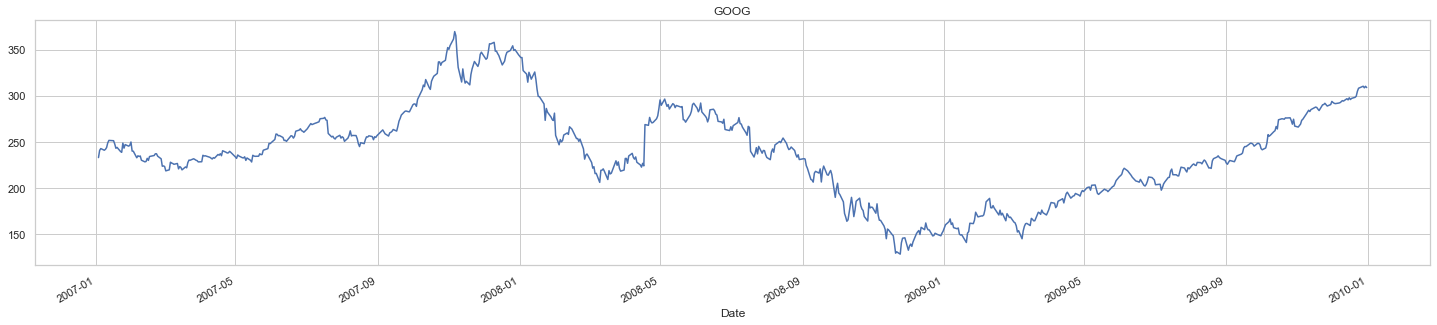

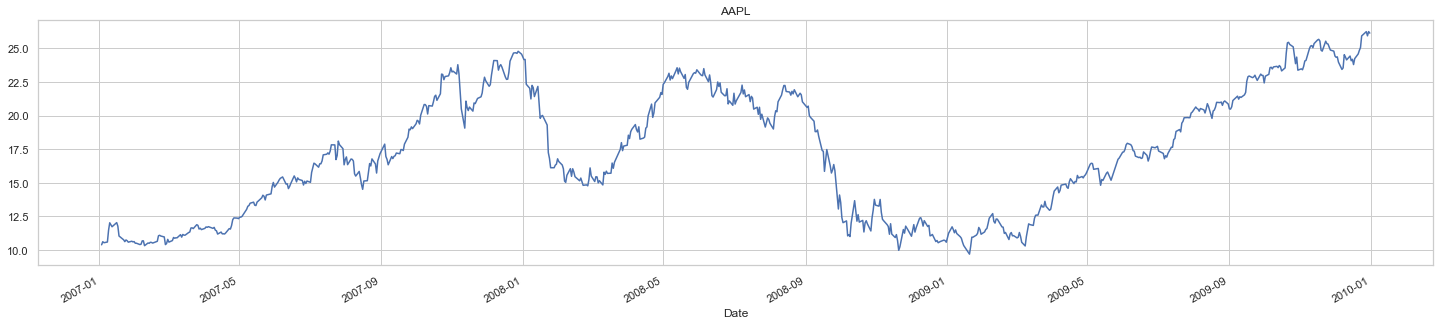

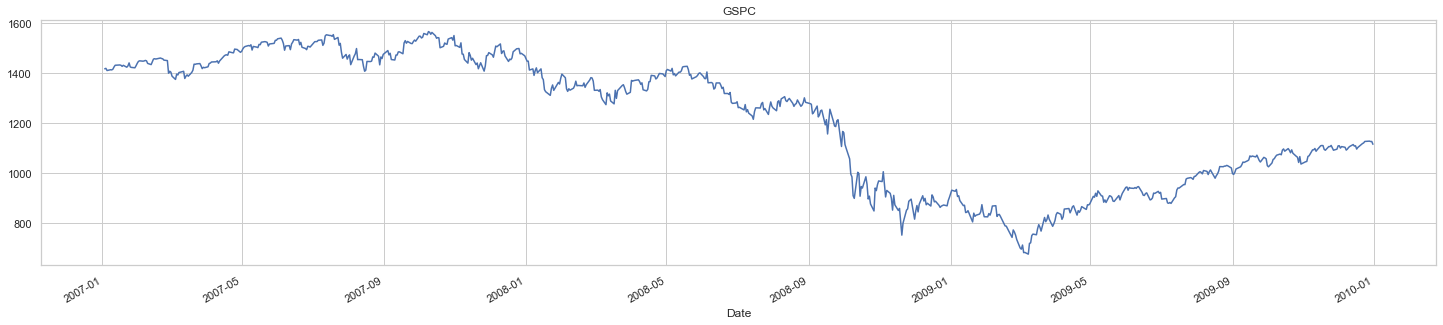

In [4]:
dates=['2007','2009']
df=get_ticker_data('GOOG',dates=dates)
df=get_ticker_data('AAPL',dates=dates)
dfind=get_ticker_data('GSPC',dates=dates)

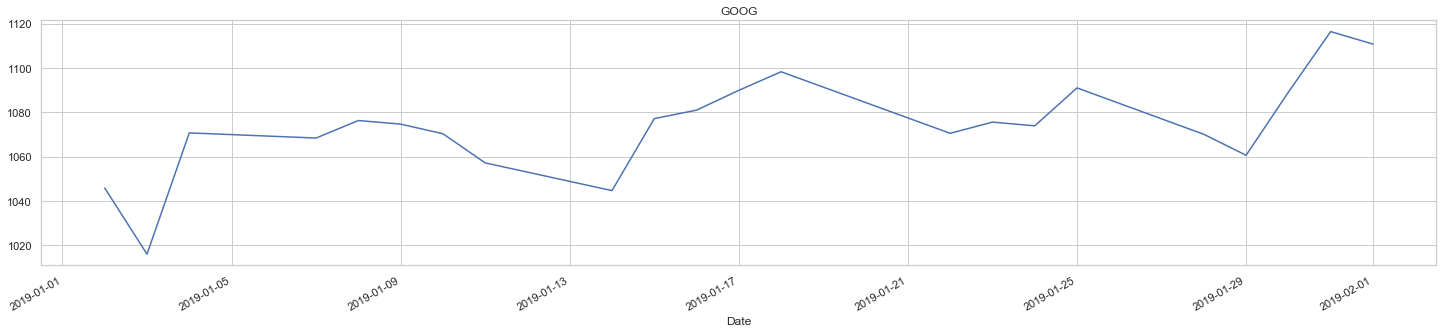

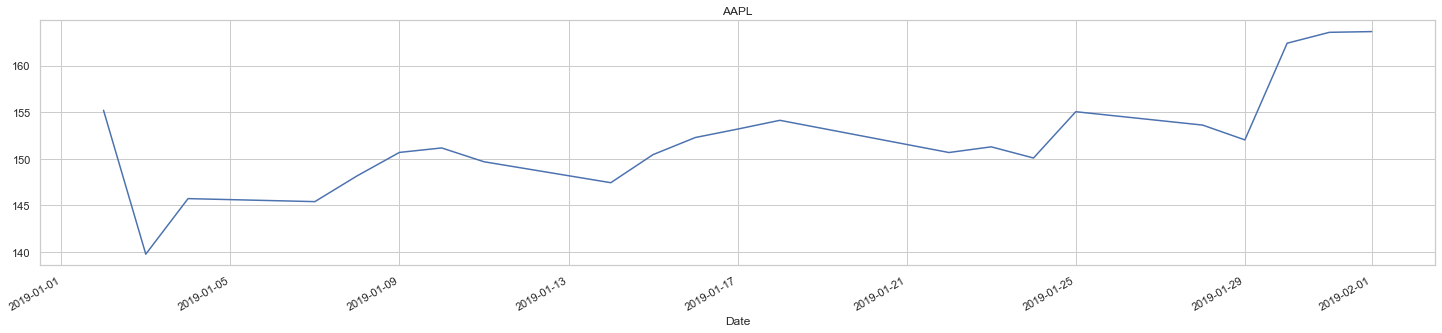

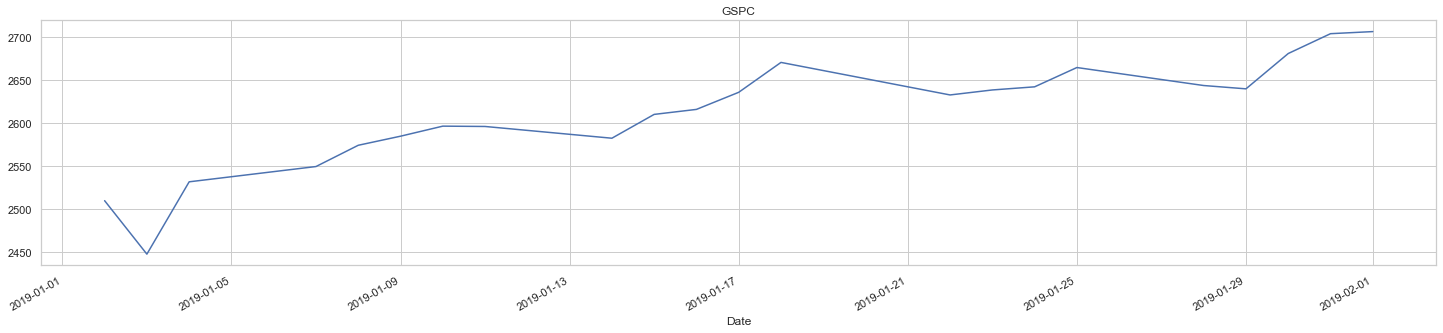

In [5]:
dates=['2019-01-01','2019-02-01']
df=get_ticker_data('GOOG',dates=dates)
df=get_ticker_data('AAPL',dates=dates)
dfind=get_ticker_data('GSPC',dates=dates)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


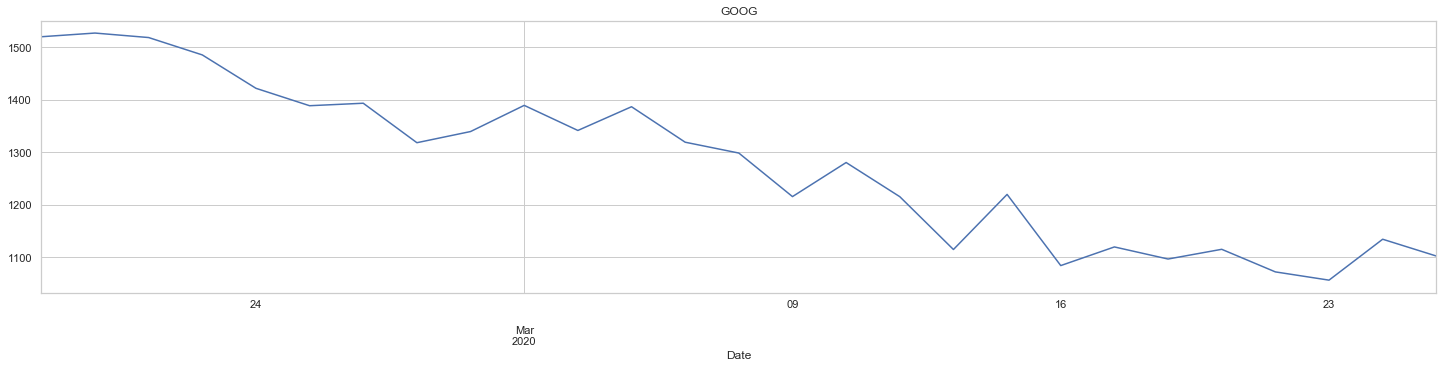

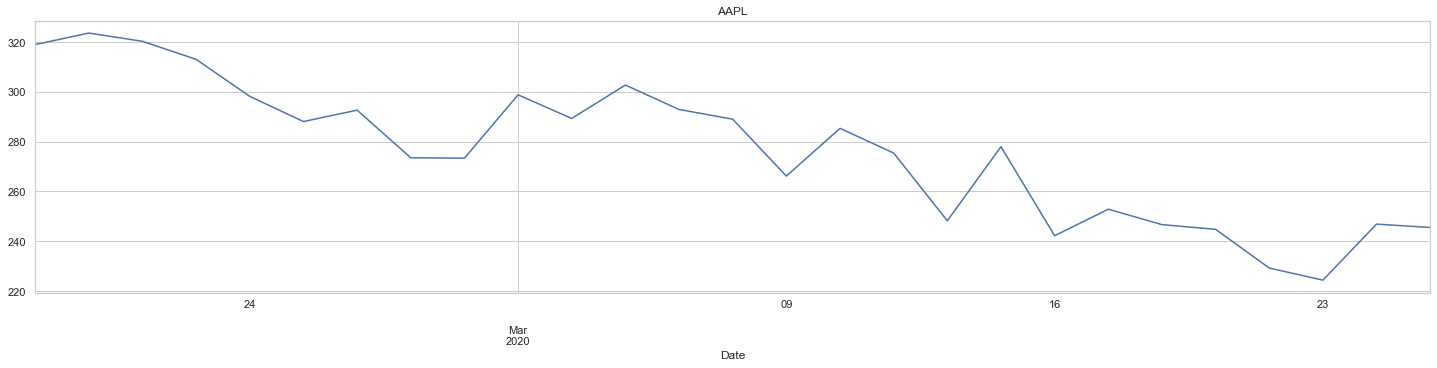

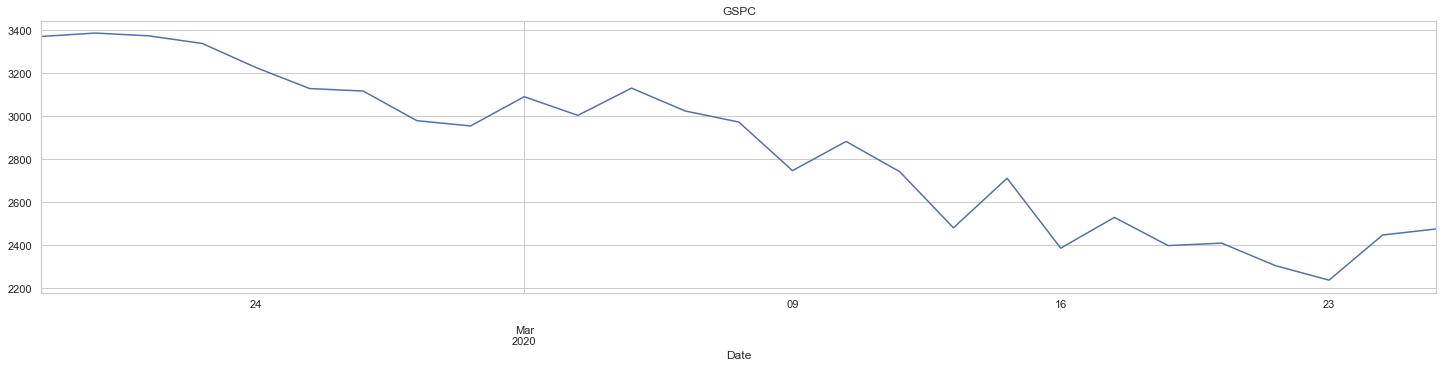

In [6]:
dates=['2020-02-18','2020-03-25']
df=get_ticker_data('GOOG',dates=dates)
df=get_ticker_data('AAPL',dates=dates)
dfind=get_ticker_data('GSPC',dates=dates)

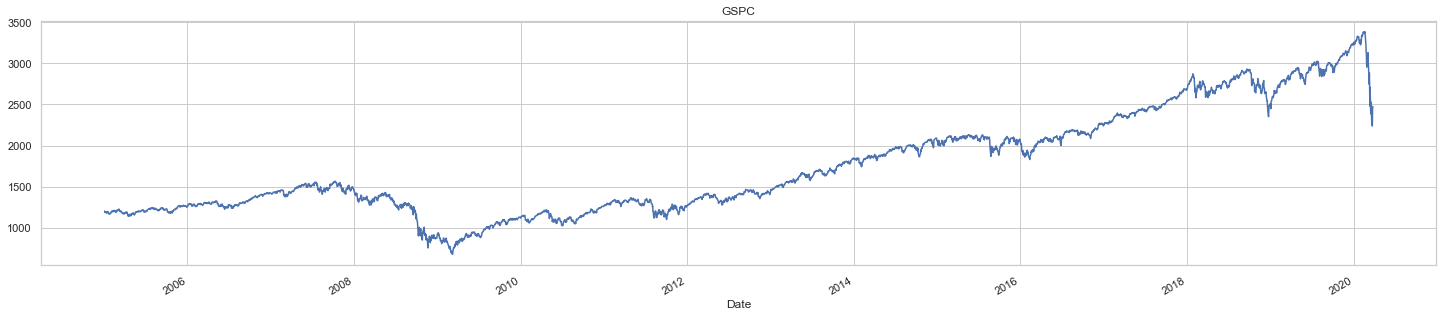

In [45]:
dfind=get_ticker_data('GSPC',dates=['2005-01-01','2020-03-25'])

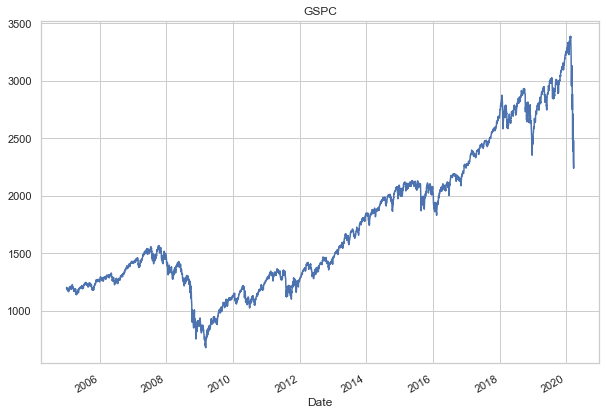

In [46]:
dfind['AdjClose'].plot(figsize=(10,7),title='GSPC')
plt.savefig('gspc_close.png',dpi=150,bbox_inches='tight')
plt.show()

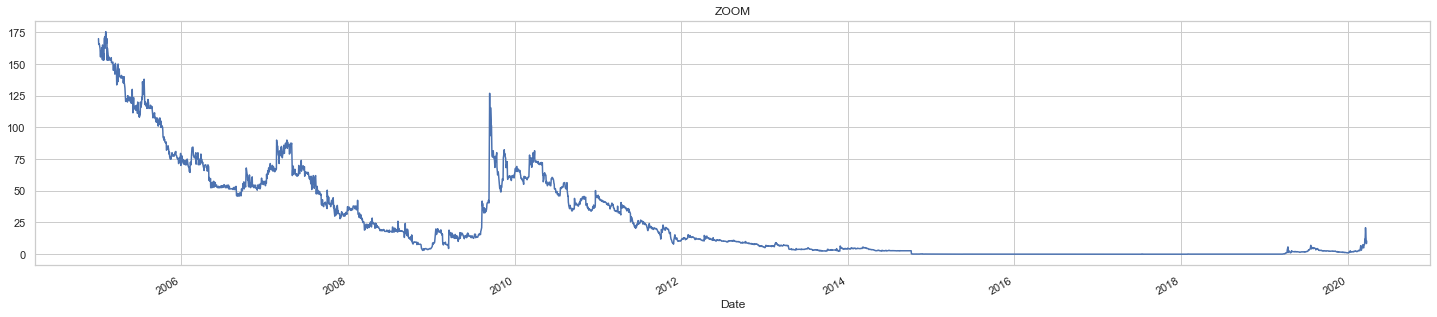

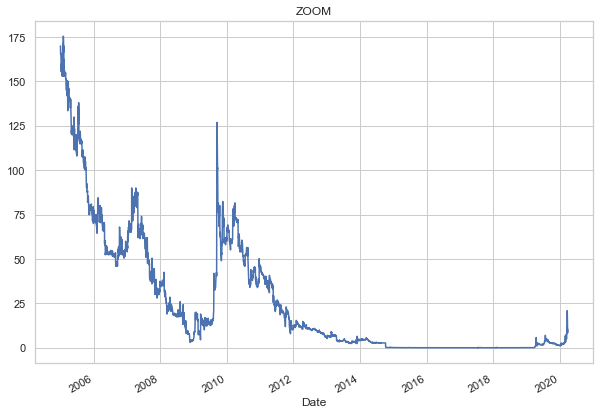

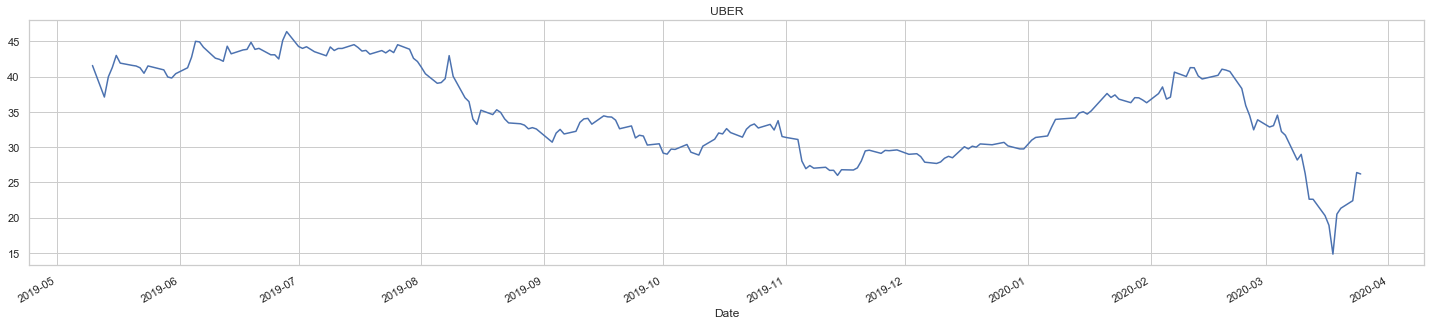

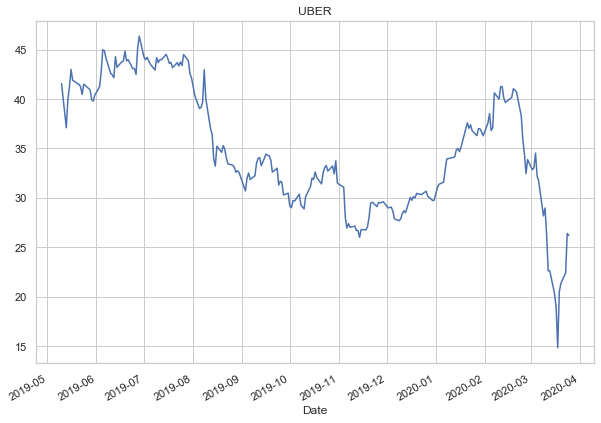

In [47]:
df=get_ticker_data('ZOOM',dates=dates)
df['AdjClose'].plot(figsize=(10,7),title='ZOOM')
plt.savefig('zoom_close.png',dpi=150,bbox_inches='tight')
plt.show()
df=get_ticker_data('UBER',dates=dates)
df['AdjClose'].plot(figsize=(10,7),title='UBER')
plt.savefig('uber_close.png',dpi=150,bbox_inches='tight')
plt.show()

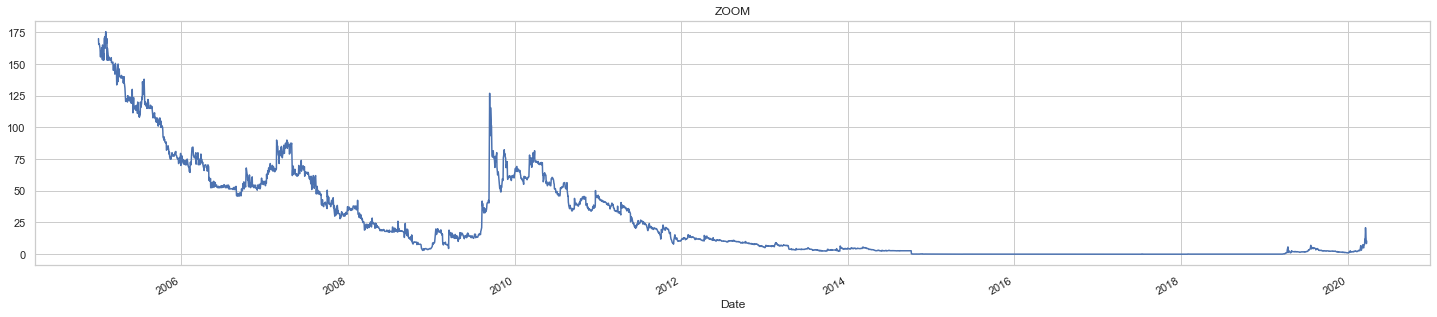

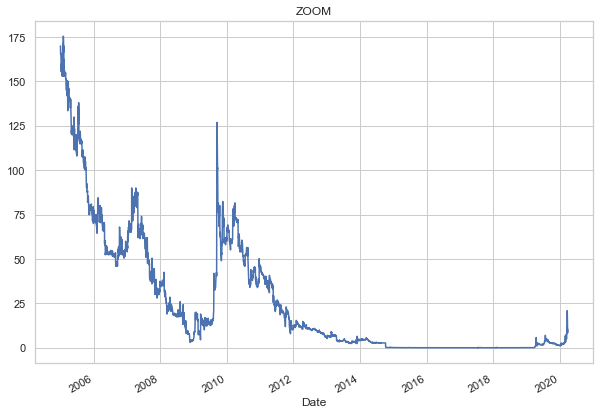

In [48]:
df=get_ticker_data('ZOOM',dates=['2005-01-01','2020-03-25'])
df['Close'].plot(figsize=(10,7),title='ZOOM')
plt.savefig('zoom_close.png',dpi=150,bbox_inches='tight')
plt.show()

In [49]:
ticker='AAPL'
crisis_dates={'crisis_2008':('2008-01-01','2009-01-31'),
              'down_turn_2018':('2018-10-01','2019-01-03'),
              'coronavirus':('2020-02-18','2020-03-25')}
dates=['2005-01-01','2020-03-25']
def get_retun_crisis_impact(ticker,dates,crisis_dates,plot_coef=False):
    df=get_ticker_data(ticker,dates=dates,plot_stock=False)
    dfind=get_ticker_data('GSPC',dates=dates,plot_stock=False)

    df['ticker_pct']=df['AdjClose'].pct_change()
    df['ind_pct']=dfind['AdjClose'].pct_change()
    df.dropna(inplace=True)

    for i in crisis_dates.keys():
        df[i]=0
        df.loc[crisis_dates[i][0]:crisis_dates[i][1],i]=1

    features=list(crisis_dates.keys())

    lr=LinearRegression()
    lr.fit(df[features].values,df['ticker_pct'].values)
    intercept=lr.intercept_
    coef=pd.Series(lr.coef_,index=features)
    if (plot_coef):
        coef.plot(kind='barh',title=ticker)
        plt.show()
    return (intercept,coef)

#tick_list=['AAPL','GOOG','GSPC']
tick_list=pd.read_csv('tickerslist.csv')['ticker'].tolist()+['ZOOM','UBER']
crisis_impact_df=pd.DataFrame()
for i in tick_list:
    print (i)
    intercept,coef=get_retun_crisis_impact(i,dates,crisis_dates)
    df1=pd.DataFrame(coef.values.reshape(1,-1),columns=coef.index)
    df1['ticker']=i
    crisis_impact_df=crisis_impact_df.append(df1)
crisis_impact_df.set_index('ticker',inplace=True)   

MMM
ABT
ABBV
ACN
ATVI
ADBE
ADT
AAP
AES
AET
AFL
AMG
A
APD
AKAM
AA
AGN
ALXN
ALLE
ADS
ALL
GOOGL
GOOG
MO
AMZN
AEE
AAL
AEP
AXP
AIG
AMT
AMP
ABC
AME
AMGN
APH
ADI
AON
APA
AIV
AAPL
AMAT
ADM
AIZ
T
ADSK
ADP
AN
AZO
AVGO
AVB
AVY
BHI
BLL
BAC
BK
BAX
BDX
BBBY
BRK-B
BBY
BIIB
BLK
HRB
BA
BWA
BXP
BSX
BMY
BF-B
CHRW
CA
COG
CPB
COF
CAH
HSIC
KMX
CCL
CAT
CBS
CELG
CNP
CTL
CERN
CF
SCHW
CHK
CVX
CMG
CB
CHD
CI
XEC
CINF
CTAS
CSCO
C
CTXS
CLX
CME
CMS
KO
CCE
CTSH
CL
CMCSA
CMA
CAG
COP
CNX
ED
STZ
GLW
COST
CCI
CSRA
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DLPH
DAL
XRAY
DVN
DO
DFS
DISCA
DISCK
DG
DLTR
D
DOV
DOW
DTE
DD
DUK
DNB
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMC
EMR
ENDP
ETR
EOG
EQT
EFX
EQIX
EQR
ESS
EL
ES
EXC
EXPE
EXPD
ESRX
XOM
FFIV
FB
FAST
FDX
FIS
FITB
FSLR
FE
FISV
FLIR
FLS
FLR
FMC
FTI
F
FOSL
BEN
FCX
FTR
GME
GPS
GRMN
GD
GE
GIS
GM
GPC
GILD
GS
GT
GWW
HAL
HBI
HOG
HAR
HIG
HAS
HCA
HP
HES
HPE
HD
HON
HRL
HST
HPQ
HUM
HBAN
ITW
ILMN
IR
INTC
ICE
IBM
IP
IPG
IFF
INTU
ISRG
IVZ
IRM
JEC
JBHT
JNJ
JCI
JPM
JNPR
KSU
K
KEY
KMB
KIM
KMI
KLAC
KSS
KHC
KR
LB


In [50]:
crisis_impact_df.head()

crisis_2008  down_turn_2018  coronavirus
ticker                                          
MMM       -0.001843       -0.002376    -0.006799
ABT       -0.000281       -0.001992    -0.008033
ABBV       0.000000       -0.001945    -0.012063
ACN       -0.000952       -0.004038    -0.012060
ATVI      -0.002381       -0.010016    -0.007003

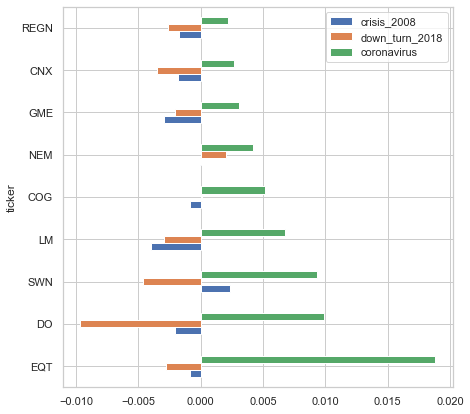

In [51]:
crisis_impact_df.sort_values('coronavirus',ascending=False, inplace=True)
crisis_impact_df.iloc[1:10,:].plot(kind='barh',figsize=(7,7))
plt.savefig('ticker_top_gain_pct.png',dpi=150,bbox_inches='tight')

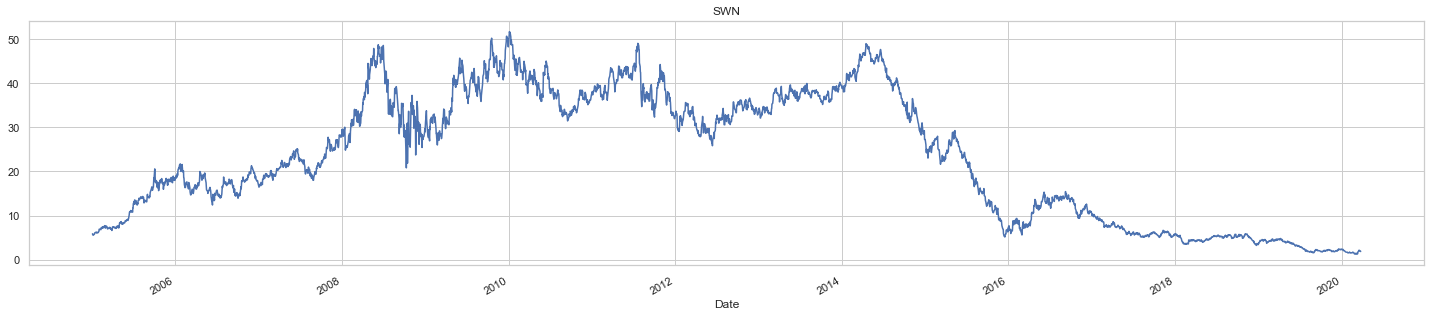

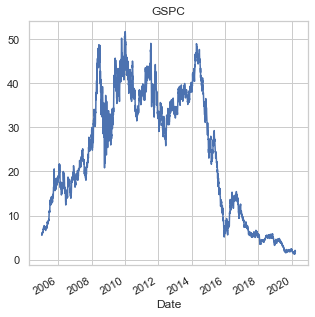

In [52]:
df1=get_ticker_data('SWN',dates=['2005-01-01','2020-03-25'])
df1['AdjClose'].plot(figsize=(5,5),title='GSPC')
plt.savefig('swn_close.png',dpi=150,bbox_inches='tight')
plt.show()

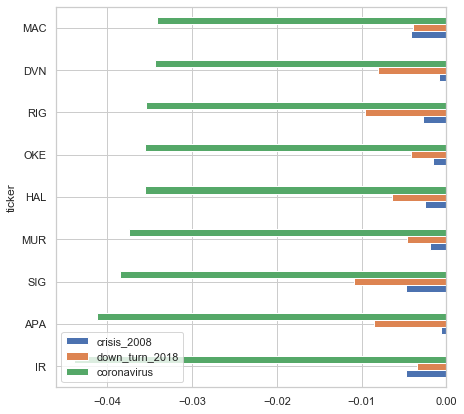

In [53]:
crisis_impact_df.sort_values('coronavirus',ascending=True, inplace=True)
crisis_impact_df.iloc[1:10,:].plot(kind='barh',figsize=(7,7))
plt.savefig('ticker_top_down_pct.png',dpi=150,bbox_inches='tight')

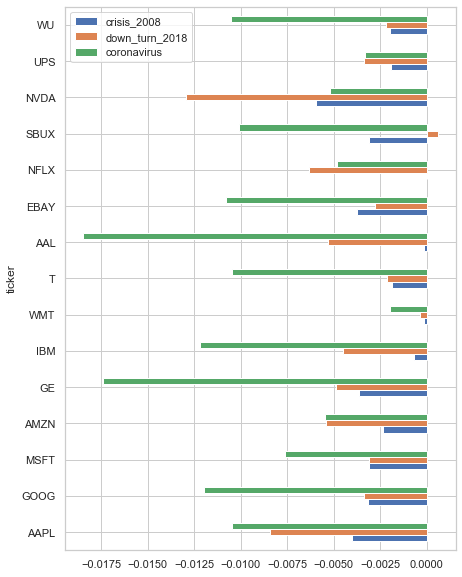

In [54]:
crisis_impact_df.loc[['AAPL','GOOG','MSFT','AMZN','GE','IBM', 'WMT','T','AAL',\
                      'EBAY','NFLX','SBUX','NVDA','UPS','WU'],:].plot(kind='barh',figsize=(7,10))
plt.savefig('ticker_chosen_pct.png',dpi=150,bbox_inches='tight')

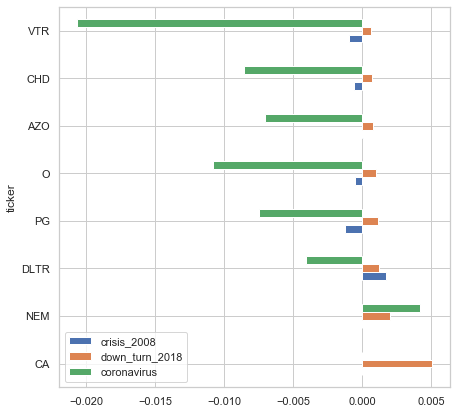

In [55]:
crisis_impact_df.sort_values('down_turn_2018',ascending=False, inplace=True)
crisis_impact_df.iloc[2:10,:].plot(kind='barh',figsize=(7,7))

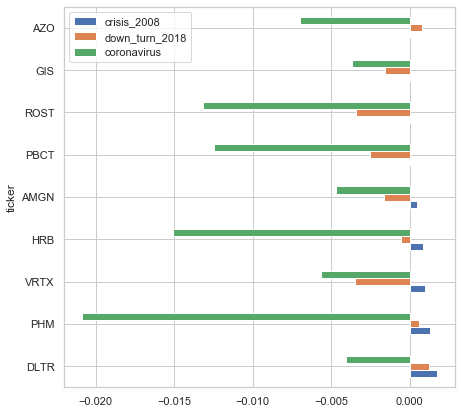

In [56]:
crisis_impact_df.sort_values('crisis_2008',ascending=False, inplace=True)
crisis_impact_df.iloc[1:10,:].plot(kind='barh',figsize=(7,7))

In [57]:
df1

High      Low     Open    Close      Volume  AdjClose
Date                                                                
2005-01-03  6.33625  5.83125  6.33625  5.88750   7938400.0   5.88750
2005-01-04  5.92375  5.65375  5.88750  5.69375   8203200.0   5.69375
2005-01-05  5.79000  5.51125  5.62750  5.60875   6220800.0   5.60875
2005-01-06  5.76250  5.60125  5.60625  5.68750   5132800.0   5.68750
2005-01-07  5.75000  5.58000  5.73750  5.63125   3808800.0   5.63125
...             ...      ...      ...      ...         ...       ...
2020-03-19  2.18000  1.96000  2.08000  2.13000  39738800.0   2.13000
2020-03-20  2.15000  1.91000  2.11000  2.08000  37331900.0   2.08000
2020-03-23  2.16000  1.97000  2.05000  1.99000  24713100.0   1.99000
2020-03-24  2.06000  1.72000  2.03000  1.98000  35658800.0   1.98000
2020-03-25  2.11000  1.78000  1.83000  1.86000  25902600.0   1.86000

[3833 rows x 6 columns]

In [67]:
model = """
data {
    int<lower=1> n;
    vector[n] crisis_2008;
    vector[n] down_turn_2018;
    vector[n] coronavirus;
    vector[n] y;
}
parameters {
    real alpha;
    real beta_2008;
    real beta_2018;
    real beta_coronavirus;
    real<lower=0> sigma; 
}
  
model {
y ~ normal(alpha+beta_2008*crisis_2008+beta_2018*down_turn_2018+beta_coronavirus*coronavirus, sigma);
}
"""
model= pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ae666d733746f56f223209aa2032caef NOW.


In [68]:
def get_stress_beta_distr(ticker,dates,crisis_dates,filename='p1.png'):
    df=get_ticker_data(ticker,dates=dates,plot_stock=True)
    df['ind_pct']=df['AdjClose'].pct_change()
    df.dropna(inplace=True)
    for i in crisis_dates.keys():
        df[i]=0
        df.loc[crisis_dates[i][0]:crisis_dates[i][1],i]=1
    data={}
    data['n']=df.shape[0]
    data['y']=df.ind_pct.values
    data['crisis_2008']=df['crisis_2008'].values
    data['down_turn_2018']=df['down_turn_2018'].values
    data['coronavirus']=df['coronavirus'].values
    fit=model.sampling(data=data, iter=3000, chains=3)
    fit_samples = fit.extract(permuted=True)

    beta_df=pd.DataFrame({'beta_2008':fit_samples['beta_2008'],'beta_2018':fit_samples['beta_2018'],
                  'beta_coronavirus':fit_samples['beta_coronavirus']})
    df_m=pd.melt(beta_df)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=df_m, y="variable", x="value")
    ax.set_ylabel('Beta')
    ax.set_title(ticker)
    fig.savefig(filename,dpi=150,bbox_inches='tight')
    plt.show()
    return(beta_df)


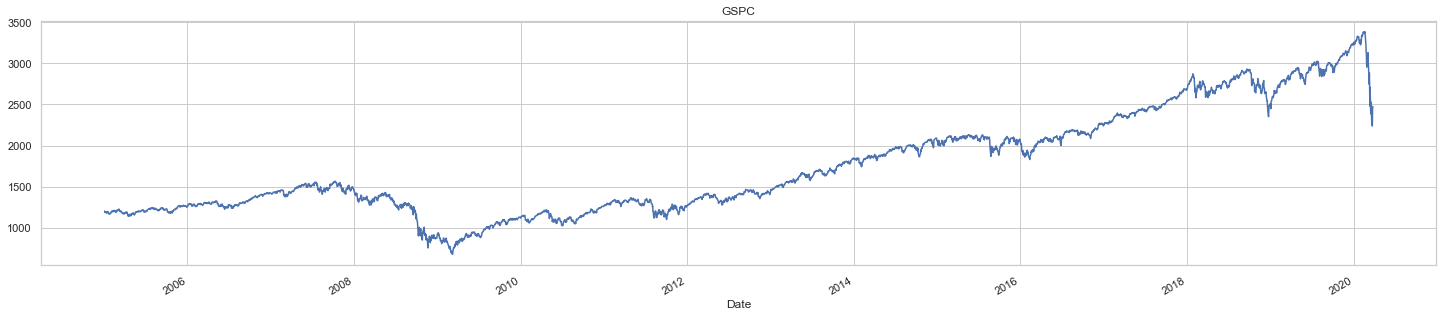

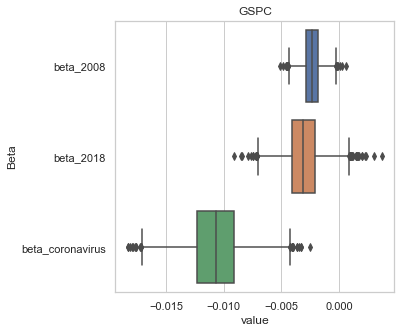

In [69]:
beta_df=get_stress_beta_distr('GSPC',dates,crisis_dates,filename='beta_gspc.png')

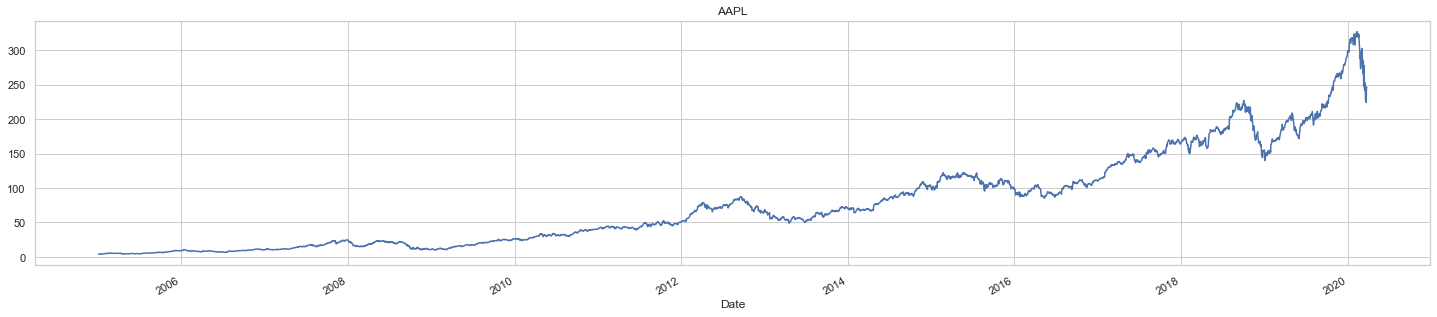

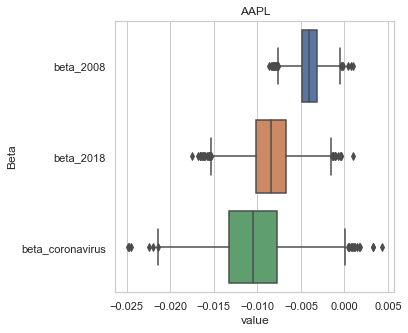

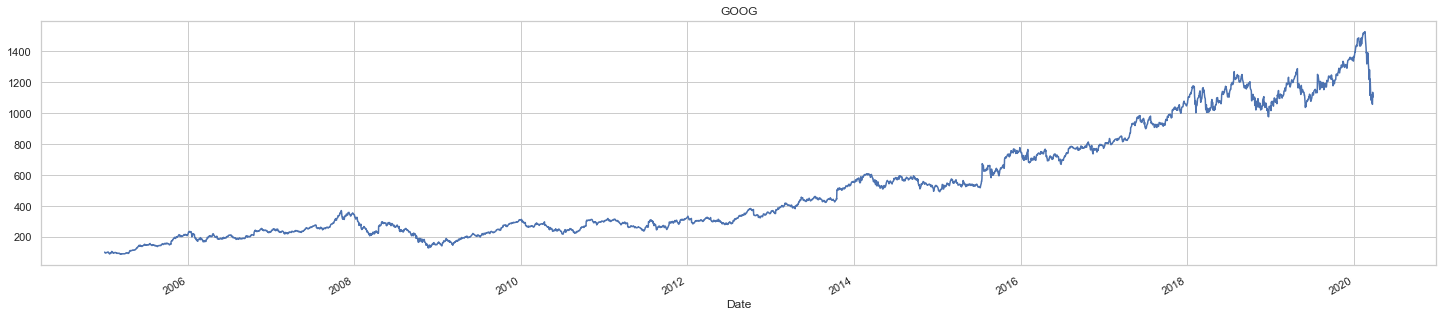

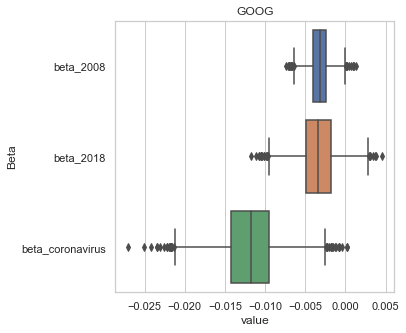

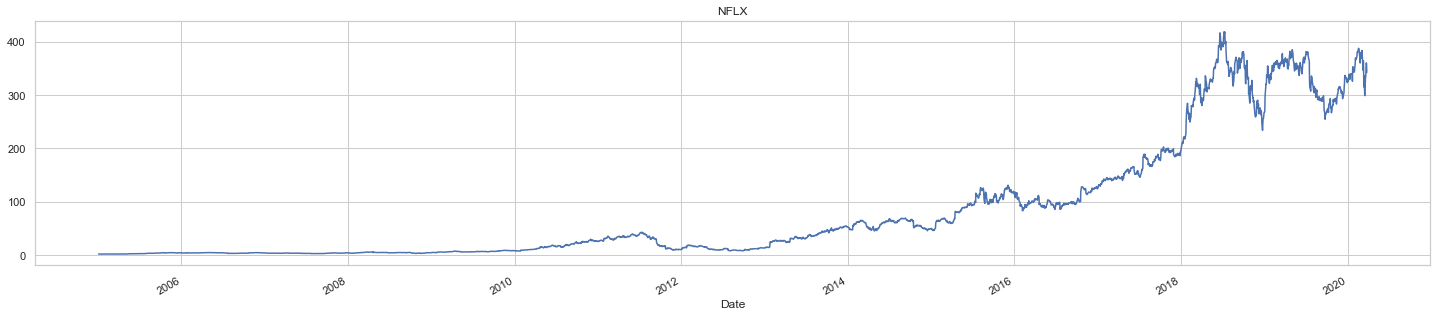

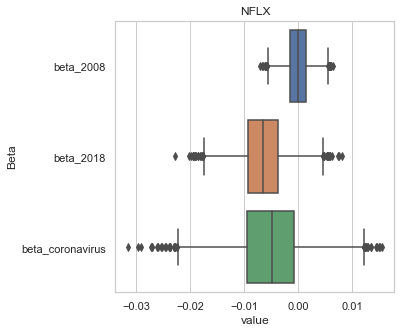

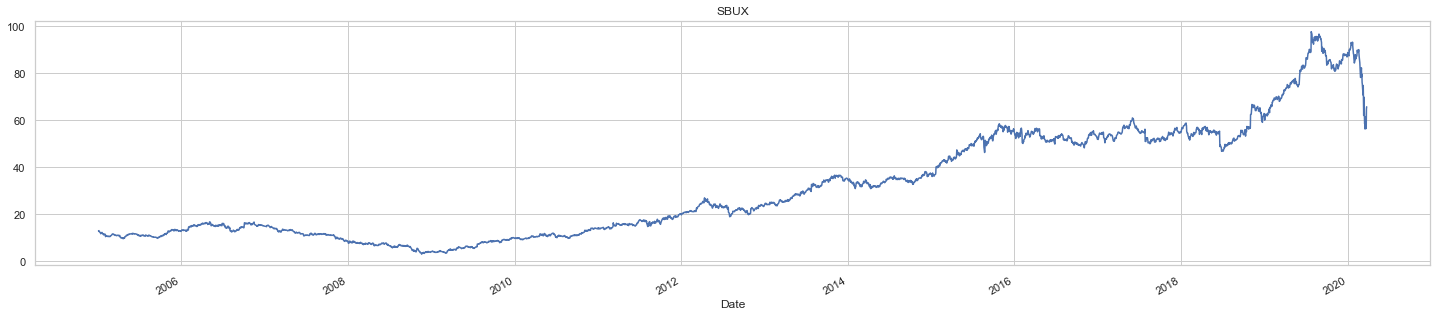

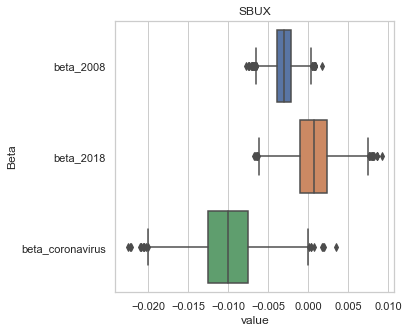

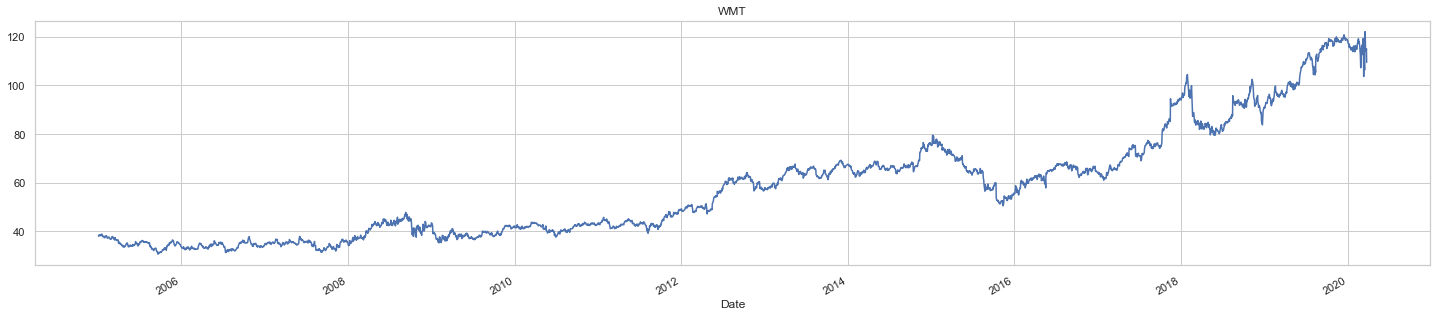

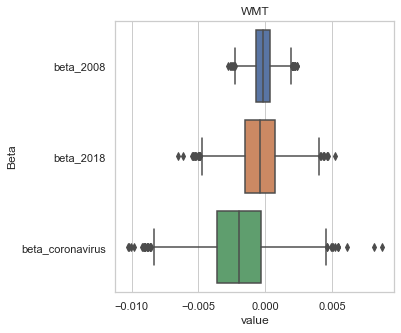

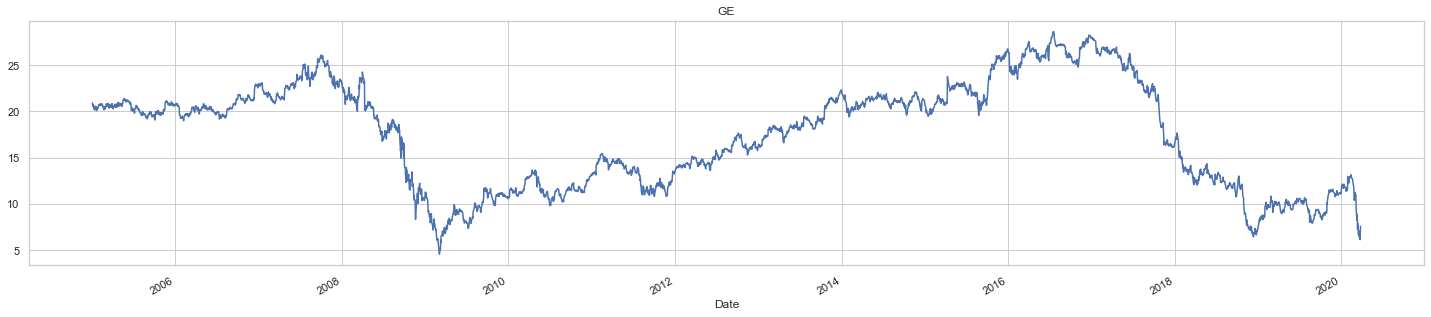

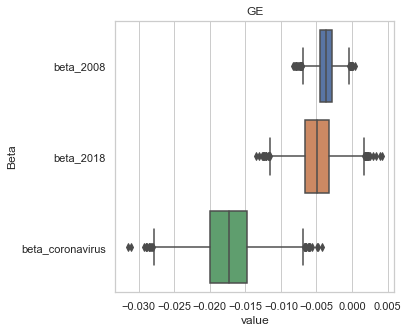

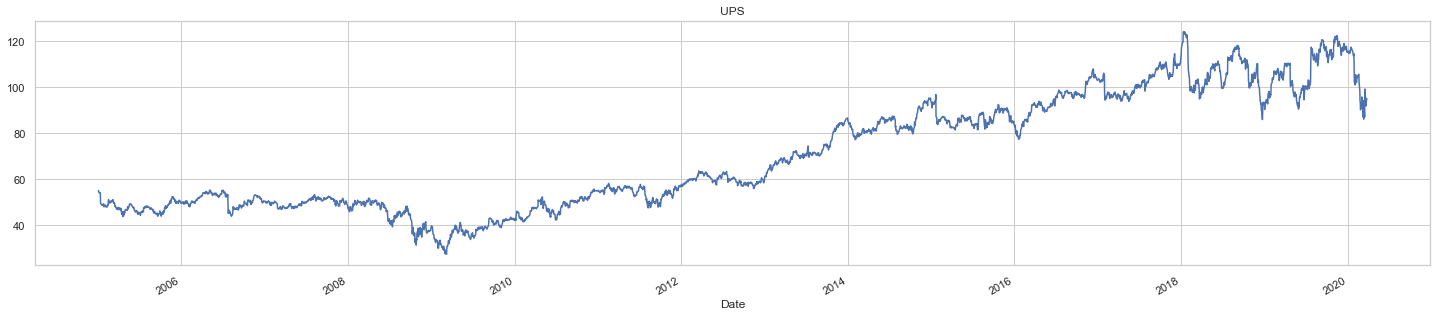

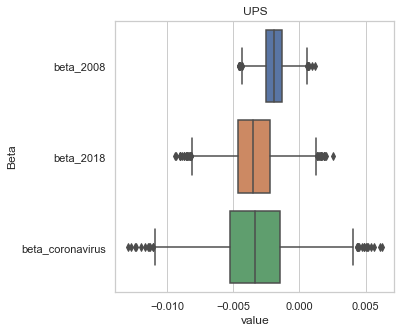

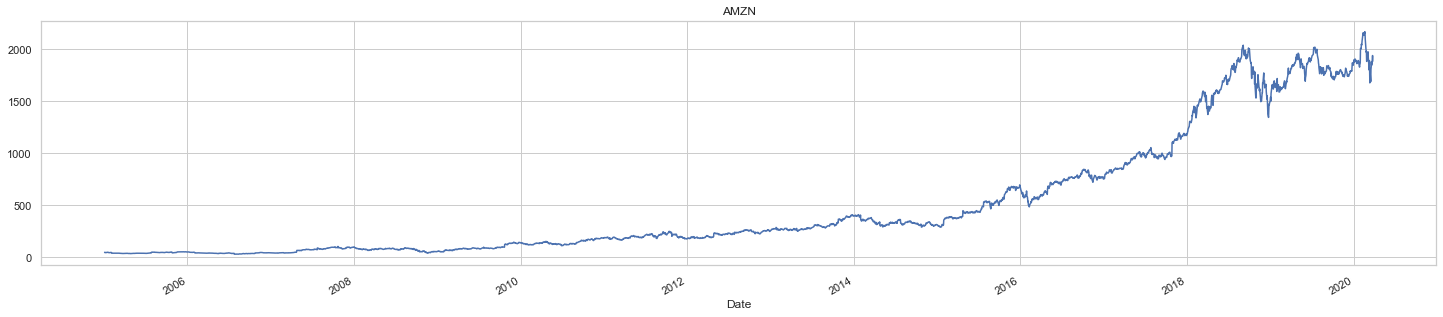

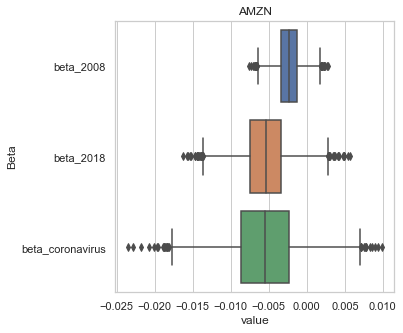

In [78]:
beta_df1=get_stress_beta_distr('AAPL',dates,crisis_dates,filename='beta_1.png')
beta_df2=get_stress_beta_distr('GOOG',dates,crisis_dates,filename='beta_1.png')
beta_df3=get_stress_beta_distr('NFLX',dates,crisis_dates,filename='beta_1.png')
beta_df4=get_stress_beta_distr('SBUX',dates,crisis_dates,filename='beta_1.png')
beta_df5=get_stress_beta_distr('WMT',dates,crisis_dates,filename='beta_1.png')
beta_df6=get_stress_beta_distr('GE',dates,crisis_dates,filename='beta_1.png')
beta_df7=get_stress_beta_distr('UPS',dates,crisis_dates,filename='beta_1.png')
beta_df8=get_stress_beta_distr('AMZN',dates,crisis_dates,filename='beta_1.png')

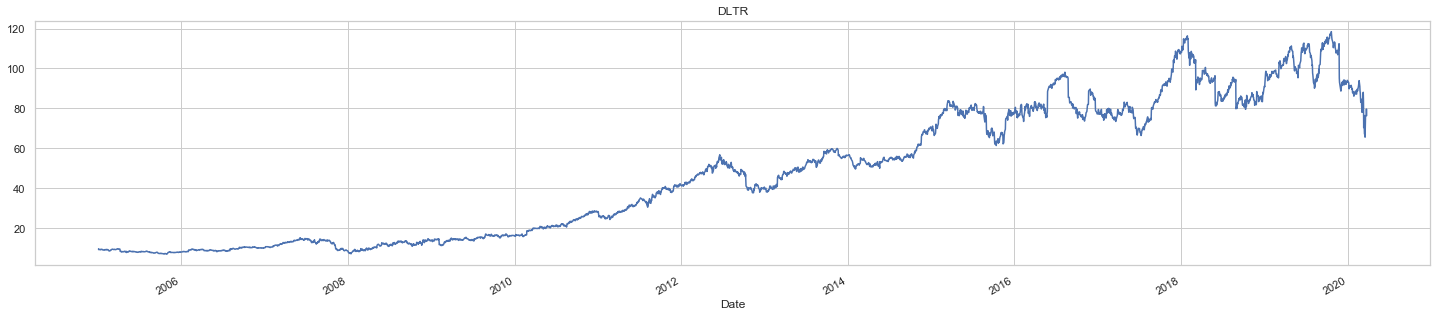

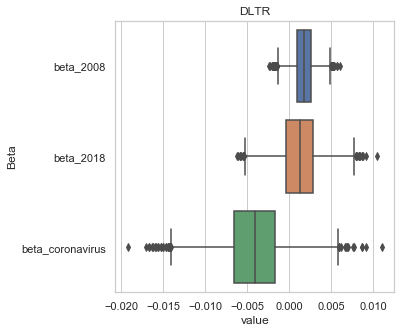

In [71]:
_=get_stress_beta_distr('DLTR',dates,crisis_dates,filename='beta_AAPL.png')

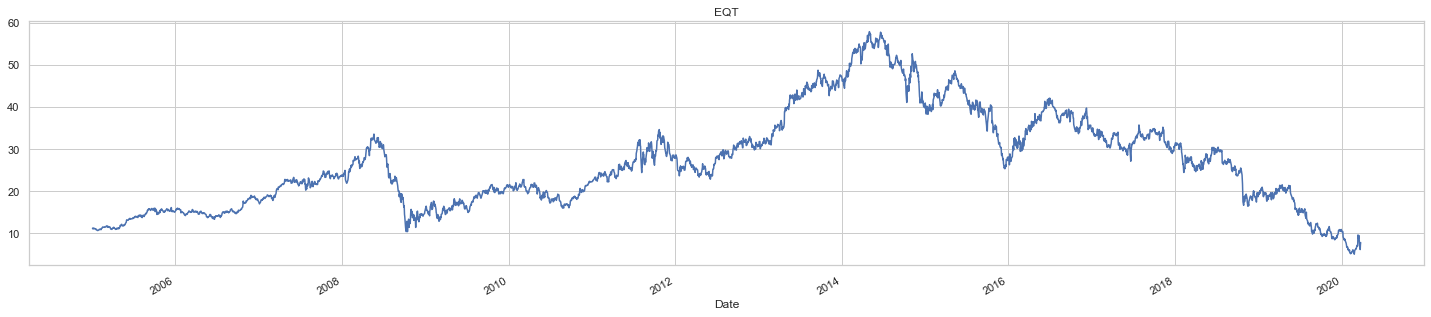

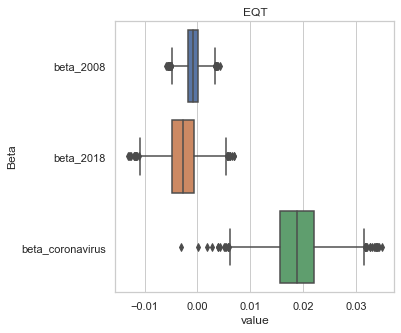

In [72]:
_=get_stress_beta_distr('EQT',dates,crisis_dates,filename='beta_EQT.png')

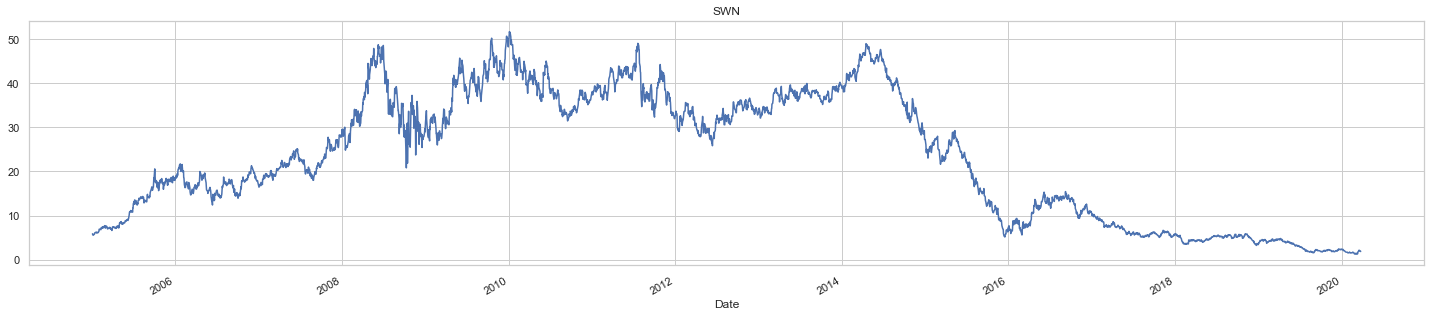

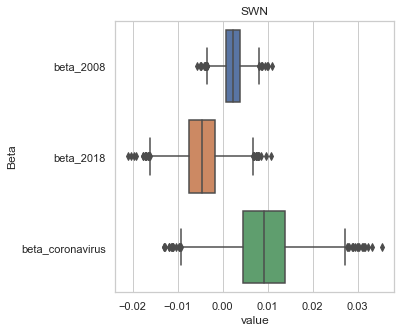

In [73]:
_=get_stress_beta_distr('SWN',dates,crisis_dates,filename='beta_EQT.png')

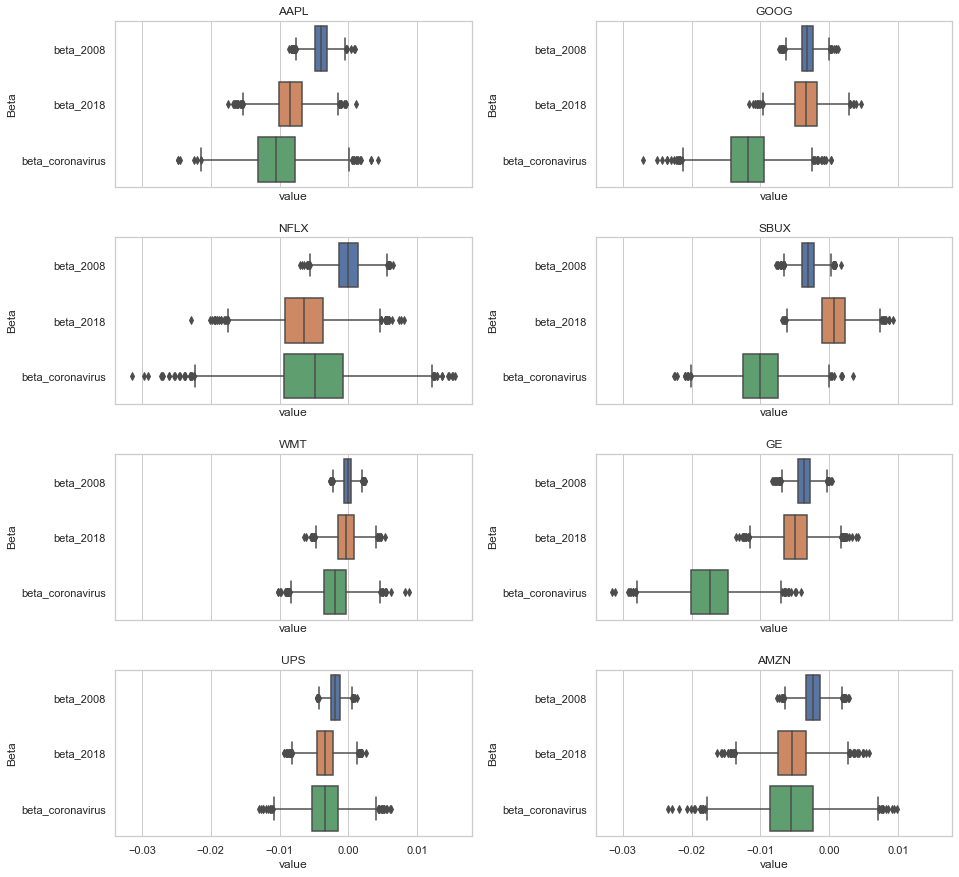

In [79]:
fig, ax = plt.subplots(4,2, sharex=True, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.35)
df_m=pd.melt(beta_df1)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[0,0])
ax[0,0].set_ylabel('Beta')
ax[0,0].set_title('AAPL')
df_m=pd.melt(beta_df2)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[0,1])
ax[0,1].set_ylabel('Beta')
ax[0,1].set_title('GOOG')
df_m=pd.melt(beta_df3)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[1,0])
ax[1,0].set_ylabel('Beta')
ax[1,0].set_title('NFLX')
df_m=pd.melt(beta_df4)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[1,1])
ax[1,1].set_ylabel('Beta')
ax[1,1].set_title('SBUX')
df_m=pd.melt(beta_df5)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[2,0])
ax[2,0].set_ylabel('Beta')
ax[2,0].set_title('WMT')
df_m=pd.melt(beta_df6)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[2,1])
ax[2,1].set_ylabel('Beta')
ax[2,1].set_title('GE')
df_m=pd.melt(beta_df7)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[3,0])
ax[3,0].set_ylabel('Beta')
ax[3,0].set_title('UPS')
df_m=pd.melt(beta_df8)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[3,1])
ax[3,1].set_ylabel('Beta')
ax[3,1].set_title('AMZN')
fig.savefig('beta_boxplots_stock.png',dpi=150,bbox_inches='tight')
plt.show()

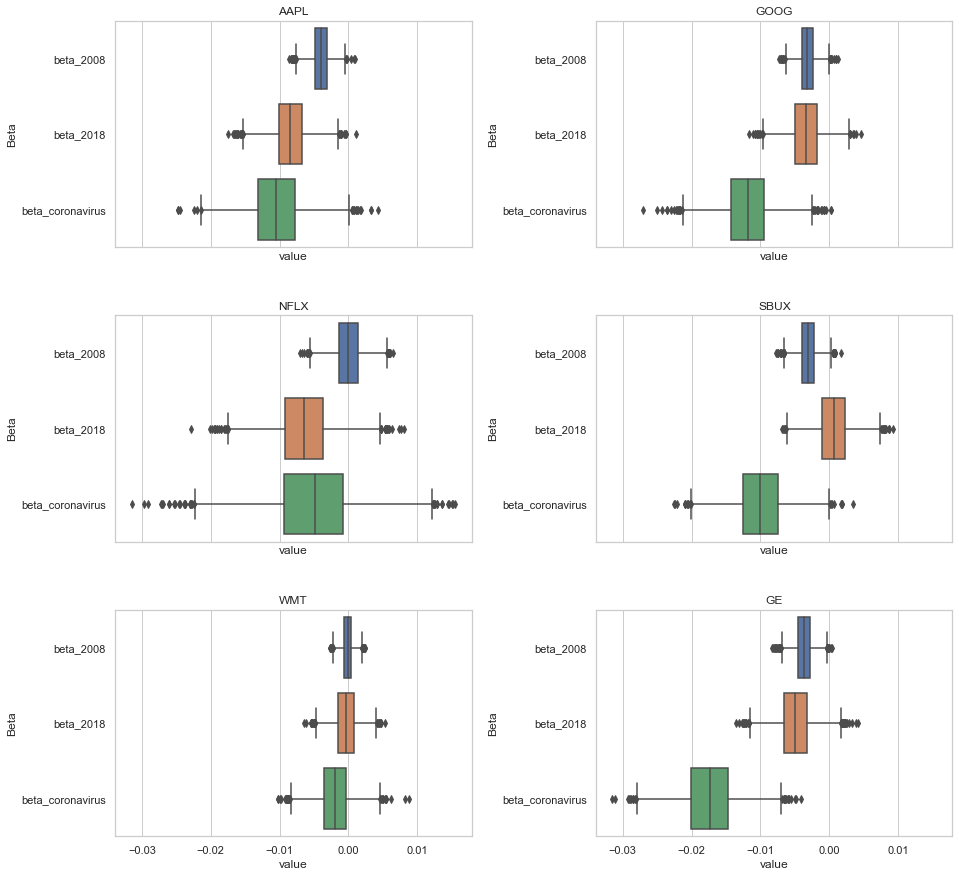

In [86]:
fig, ax = plt.subplots(3,2, sharex=True, figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.35)
df_m=pd.melt(beta_df1)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[0,0])
ax[0,0].set_ylabel('Beta')
ax[0,0].set_title('AAPL')
df_m=pd.melt(beta_df2)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[0,1])
ax[0,1].set_ylabel('Beta')
ax[0,1].set_title('GOOG')
df_m=pd.melt(beta_df3)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[1,0])
ax[1,0].set_ylabel('Beta')
ax[1,0].set_title('NFLX')
df_m=pd.melt(beta_df4)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[1,1])
ax[1,1].set_ylabel('Beta')
ax[1,1].set_title('SBUX')
df_m=pd.melt(beta_df5)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[2,0])
ax[2,0].set_ylabel('Beta')
ax[2,0].set_title('WMT')
df_m=pd.melt(beta_df6)
sns.boxplot(data=df_m, y="variable", x="value", ax = ax[2,1])
ax[2,1].set_ylabel('Beta')
ax[2,1].set_title('GE')
fig.savefig('beta_boxplots_stock.png',dpi=150,bbox_inches='tight')
plt.show()